# <center> Distribuciones Empíricas </center>
## Introducción
En algunas situaciones, podríamos querer utilizar los propios datos observados para especificar directamente (en cierto sentido) una distribución, llamada distribución empírica, a partir de la cual se generan valores aleatorios durante la simulación, en lugar de ajustar una distribución teórica a los datos.
## 1. Distribución Empírica Continua
A continuación se describen dos formas de obtener la distribución empírica de un conjunto de datos continuos y luego generar datos a partir de ellas:
- Usando `rv_histogram` de `scipy.stats`.
- Usando la `ECDF` de `statmodels`.

### 1.1 **Usando** `rv_histogram` **de** `scipy.stats`
`rv_histogram` permite modelar la distribución empírica de los datos a partir de un histograma.

**Pasos:**

1. Importar las librerías necesarias:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import rv_histogram
import pandas as pd

2. Generar o cargar un conjunto de datos

In [3]:
df = pd.read_excel('Datos1.xlsx')
data = df['Datos']

3. Crear un histograma y ajustar `rv_histogram`

In [4]:
# Crear el histograma
hist = np.histogram(data, bins="sturges", density=True)

# Ajustar el histograma a una distribución
hist_dist = rv_histogram(hist)
print(hist_dist.cdf(8.0))
print(hist_dist.mean())
print(hist_dist.std())
print(hist_dist.pdf(8.0))
print(hist_dist.ppf(0.5))
print(hist_dist.stats(moments='mvsk'))
print(hist_dist.stats(moments='s'))
print(hist_dist.moment(1))
print(hist_dist.support())

0.41035335689045943
17.726857142857142
15.96991686516471
0.05194346289752651
11.779365079365078
(np.float64(17.726857142857142), np.float64(255.03824468027221), np.float64(0.9056434704687921), np.float64(-0.4176272980147262))
0.9056434704687921
17.726857142857142
(np.float64(0.1), np.float64(56.7))


4. Visualizar la distribución ajustada

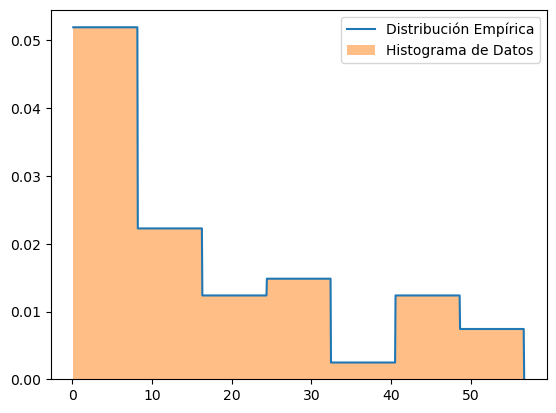

In [5]:
x = np.linspace(min(data), max(data), 1000)
plt.plot(x, hist_dist.pdf(x), label='Distribución Empírica')
plt.hist(data, bins=7, density=True, alpha=0.5, label='Histograma de Datos')
plt.legend()
plt.show()

5. Generar nuevos datos a partir de la distribución empírica

In [6]:
new_samples = hist_dist.rvs(size=10)
print(new_samples)

[ 4.80036259  7.3151214  21.87782675  1.49391189  0.61673392  5.84993524
  4.56544379 38.83132565 10.84117016 15.22213836]


### 1.2 **Usando la** `ECDF` **de** `statsmodels`
La función de Distribución Empírica Acumulada (ECDF) proporciona una forma alternativa de modelar la distribución.

**Pasos:**
1. Importar la `ECDF` de `statsmodels`:

In [7]:
from statsmodels.distributions.empirical_distribution import ECDF

2. Ajustar la `ECDF` a los datos:

In [8]:
ecdf = ECDF(data)
print(ecdf(12))

0.56


3. Visualizar la `ECDF`:

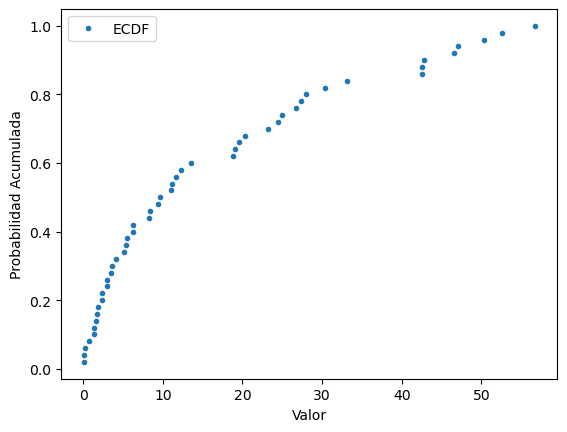

In [9]:
plt.plot(ecdf.x, ecdf.y, marker='.', linestyle='none', label='ECDF')
plt.xlabel('Valor')
plt.ylabel('Probabilidad Acumulada')
plt.legend()
plt.show()

4. Generar datos a partir de la `ECDF`:

In [10]:
from scipy.interpolate import interp1d

cdf_interp = interp1d(ecdf.x, ecdf.y, bounds_error=False, fill_value=(0, 1))
print(cdf_interp(12))
inverse_cdf = interp1d(ecdf.y, ecdf.x, bounds_error=False, fill_value="extrapolate")
samples = inverse_cdf(np.random.rand(10))
print(samples)

# new_sample_ecdf = np.interp(np.random.rand(), ecdf.y, ecdf.x)  # Inversión de la ECDF
# print(new_sample_ecdf)

0.5714285714285715
[11.02014792  0.23950001  0.1        11.04774484  0.74698265  0.19876976
  3.33297129 17.01119584  9.48358091 11.71980953]


5. Cálculo de probabilidades con la ecdf o la cdf_interp:

In [11]:
from IPython.display import display, Math
prob = ecdf(30)
display(Math(fr'P(X \leq 30) = {prob:.4f}'))
prob1 = ecdf(30) - ecdf(10)
display(Math(fr'P(10 \leq X \leq 30) = {prob1:.4f}'))
prob2 = cdf_interp(35)
display(Math(fr'P(X \leq 35) = {prob2:.4f}'))  

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### **Conclusiones**
Ambos métodos permiten modelar la distribución empírica y generar nuevos datos:
- `rv_histogram` es útil si queremos representar la distribución a partir de un histograma.
- `ECDF` ofrece una aproximación suave basada en la función acumulativa empírica.

Dependiendo del caso de uso, se puede elegir el método más adecuado para la generación de datos sintéticos.